### ANOVA

- 선형회귀분석의 결과가 얼마나 좋은지는 단순히 잔차제곱합으로 평가할 수 없다.
- 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라지기 때문이다.
- 분산 분석은 종속 변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 
- 선형회귀 분석의 성능 비교에 응용할 수 있으며, 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.

- TSS = ESS + RSS
- 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기보다 클 수 없다.
- 모형의 성능이 좋을 수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.

In [5]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.api as sm
import scipy as sp

X0,y,coef = make_regression(n_samples = 100, n_features = 1, noise =30, coef = True, random_state=0)
dfX0 = pd.DataFrame(X0,columns=['X'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y,columns=['Y'])
df = pd.concat([dfX,dfy],axis=1)

model = sm.OLS.from_formula('Y ~ X',data = df)
result = model.fit()

In [3]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS =  102754.33755137533
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922586


/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


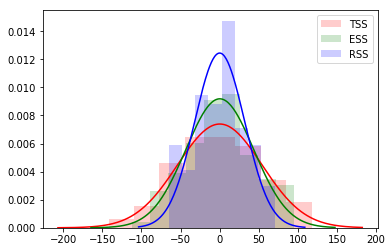

In [6]:
sns.distplot(y, kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"}, 
             label="TSS")
sns.distplot(result.fittedvalues, kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"}, 
             label="ESS")
sns.distplot(result.resid, kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"}, 
             label="RSS")
plt.legend()
plt.show()

#### 결정계수(Coefficient of determination)
- 분산 관계식에서 모형의 성능을 나타내는 결정계수 r-squared를 정의할 수 있다.
- `r_squared = 1- RSS/TSS = ESS/TSS`
- 0 <= r_squared <= 1 ( 모든 분산값은 자승이기 때문에 모두 양수이다.)
 - 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.


#### 분산 분석표

In [18]:
anovatable = pd.DataFrame(columns=['source','df','ss','ms','Ftest'])
anovatable.source = ['Regression','Residual','Total','R^2']
anovatable.df = ['K-1','N-K','N-1','None']
anovatable.ss = ['ESS','RSS','TSS','None']
anovatable.ms = ['ESS/K-1','RSS/N-K','TSS/N-1','None']
anovatable.Ftest = ['F = s_y^2 / s_e^2','None','None','None']
anovatable

,source,df,ss,ms,Ftest
0,Regression,K-1,ESS,ESS/K-1,F = s_y^2 / s_e^2
1,Residual,N-K,RSS,RSS/N-K,None
2,Total,N-1,TSS,TSS/N-1,None
3,R^2,None,None,None,None


#### 회귀 분석 F-검정과 분산 분석의 관계
- 위와 같은 표를 사용하는 이유는 분산 분석의 결과를 이용하여 회귀 분석 F검정에 사용할 수 있기 때문이다.
- F검정의 귀무가설은 모든 가중치가 0 즉 결정계수가 0이다 와 같다.
- 이 통계량(statistic)은 ESS's mus/RSS's ms 로 구할 수 있다.

In [19]:
result

In [21]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [22]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           6.60e-24
Time:                        09:34:53   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


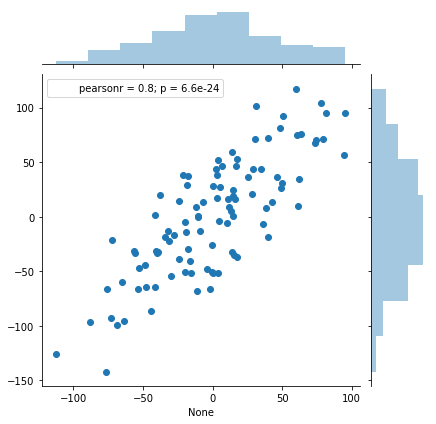

In [24]:
sns.jointplot(result.fittedvalues,y)
plt.show()

#### F 검정을 이용한 모형 비교
- F 검정을 이용하면 다음과 같이 포함관계에 있는 두 모형의 성능을 비교할 수 있다.
    - 전체 모형 : y = w_0 + w_1x_1 + w_2x_2 + w_3x_3
    - 축소 모형 : y = w_0 + w_1x_1
    - H_0 : w_2 = w_3 = 0
- 위의 전체 모형과 축소 모형을 비교하는 것은 위에서 마지막에 정의한 귀무가설을 검정하는 것과 같은 이야기이다.
- 이 검정도 F 검정을 사용하여 할 수 있다. (annov_lm)

In [25]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [26]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())         

/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11082.941389,0.0,NaN,NaN,NaN
1,492.0,11080.276284,2.0,2.665105,0.05917,0.942554


annova_lm 명령에서는 type 인수를 2로 지정하면 하나하나의 변수를 뺀 축구 모형에서의 F 검정값을 한번에 계산할 수 있다.

In [27]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


In [28]:
model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


In [29]:
model_chas = sm.OLS.from_formula("MEDV ~ C(CHAS) + 0", data=df_boston)
sm.stats.anova_lm(model_chas.fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),2.0,258222.123856,129111.061928,1571.626788,2.495018e-217
Residual,504.0,41404.216144,82.151223,NaN,NaN


In [30]:
print(model_chas.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           7.39e-05
Time:                        10:10:14   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(CHAS)[0.0]    22.0938      0.418     52.902   

### 회귀 분석 결과의 진단
- 회귀 분석 결과의 진단이란 회귀 분석에 사용된 `데이터`가 회귀분석에 사용된 모형 가정을 제대로 만족하는지를 확인하는 과정이다.

### 잔차 정규성
- 데이터가 모형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다.

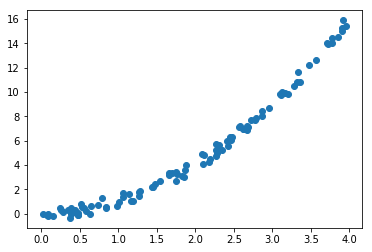

In [32]:
def make_regression2(n_sample = 100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [33]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

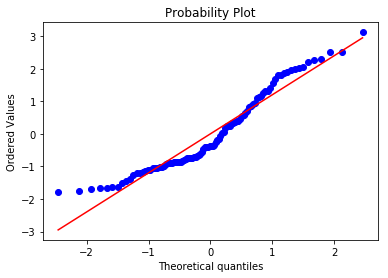

In [34]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

- 잔차와 독립 변수의 관계

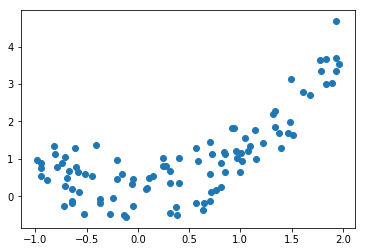

In [39]:
def make_regression3(n_sample = 100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [40]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

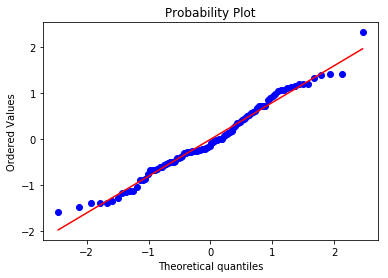

In [41]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()


- 데이터가 모형가정을 따르지 않지만, 잔차는 정규분포를 따를 수 있음을 알 수 있다.
- 이런 경우에는 잔차와 독립 변수간의 관계를 살펴보는 것이 도움이 될 수 있다.
- 잔차와 독립 변수가 어떠한 상관관계가 존재한다면 올바른 모형이 아니라고 할 수 있다.
- 하지만 이는 전체 모형이 올바르지 않다는 것만 알려주지 어떠한 모형이 올바른 것이다라고 얘기해주는 것은 아니다.

#### 이분산성
- 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야 한다.
- 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 이분산성 문제가 발생한다.

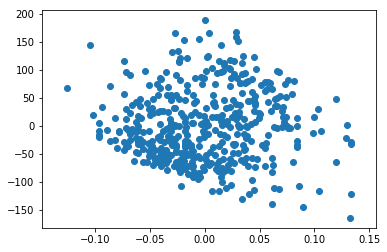

In [42]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()
plt.scatter(df["x9"], result.resid)
plt.show()

### 자기 상관 계수
- 선형 회귀 모형에서는 오차는들이 서로 독립이라고 가정하고 있다.
- 따라서 잔차들도 서로 독립이여야 한다. 만약 아니라면 선형회귀가 아닌 시계열 분석을 실시해야 한다.
- 오차가 독립인지 아닌지를 검정하는 방법은 잔차를 시계열로 가정하여 자기상관계쑤를 구하는 것이다. 독립이라면 시차가 0인 경우를 제외하고는 자기상관계수가 0이여야 한다.